# Mergin Maps Synchronization

Mergin Maps synchronization operates using a push/pull mechanism for your project. 

- **Push**: Synchronize your local project changes to the Mergin Maps server
- **Pull**: Updates from the server are synchronized to the local device

## Example project

Imagine you are preparing a project for tree surveyors in Vienna.

The task for the surveyors is to collect data about existing trees in the city. They are focusing on the health of the trees. In this example, we will use the Mergin Maps Python API client to automatically synchronize data to the Mergin Maps server. We will import CSV data into a GeoPackage and synchronize it. This GeoPackage can then be used for further data collection in the field.

Let's install mergin client and necessary libraries for this example.

In [ ]:
!pip install mergin-client

Fill the following variables with your Mergin Maps credentials (username / email and password).

In [ ]:
LOGIN="..."
PASSWORD="..."

Let's login to your account to be able to use the `MerginClient` class methods to automate your workflows.

In [ ]:
import mergin

client = mergin.MerginClient(
    login=LOGIN,
    password=PASSWORD
)

Now you can use the client to call the API. Let's try to clone the project available for this example (`lutraconsulting/Vienna trees example`) to your Mergin Maps project. You need to specify to which project our sample project will be cloned to (edit the `PROJECT` variable in the form `{WORKSPACE NAME}/{PROJECT NAME}` in Mergin Maps cloud).

In [ ]:
PROJECT=".../..."

client.clone_project("lutraconsulting/Vienna trees example", PROJECT)

Project contains geopackage `Ready to survey trees` where surveyors can collect trees health and `vienna_trees_gansehauffel.csv` file with all trees from Gänsehäufel in Vienna. Let's download project to your computer using `download_project` method. 

In [ ]:
# download project to local folder.
LOCAL_FOLDER="/tmp/project"

client.download_project(PROJECT, LOCAL_FOLDER)

We can now add sample points from the `.csv` file to the GeoPackage. These points within the GeoPackage will then be available to surveyors in the field for editing the health column using the Mergin Maps mobile application.

In [ ]:
# Install geopandas to export csv to geopackage
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import os

# Get the data from the CSV (use just sample of data)
csv_file = os.path.join(LOCAL_FOLDER, "vienna_trees_gansehauffel.csv")
csv_df = pd.read_csv(csv_file, nrows=20, dtype={"health": str})
# Convert geometry in WKT format to GeoDataFrame
gdf = gpd.GeoDataFrame(csv_df, geometry=gpd.GeoSeries.from_wkt(csv_df.geometry))
print(gdf.head())
# Save the GeoDataFrame to a Geopackage
gdf.to_file(
    os.path.join(LOCAL_FOLDER, "Ready_to_survey_trees.gpkg"), 
    layer="Ready_to_survey_trees", driver="GPKG",
)


You can now see changes in geopackage file using `project_status` method. 

In [ ]:
_, push_changes, __ = client.project_status(LOCAL_FOLDER)
print(push_changes.get("updated"))

[{'path': 'Ready_to_survey_trees.gpkg', 'checksum': '3ba7658d231fefe30d9410f41c75f37d1ba5e614', 'size': 98304, 'mtime': datetime.datetime(2025, 5, 27, 16, 24, 30, 122463, tzinfo=tzlocal()), 'origin_checksum': '19b3331abc515a955691401918804d8bcf397ee4', 'chunks': ['be489067-d078-4862-bae1-c1cb222f680a']}]


You can now use `push_project` method to push data to the server.

In [ ]:
client.push_project(LOCAL_FOLDER)

To pull the latest version of the project, use `pull_project` method.

In [ ]:
client.pull_project(LOCAL_FOLDER)

Mobile application users are now enabled to perform updates to the imported tree data directly in the field.

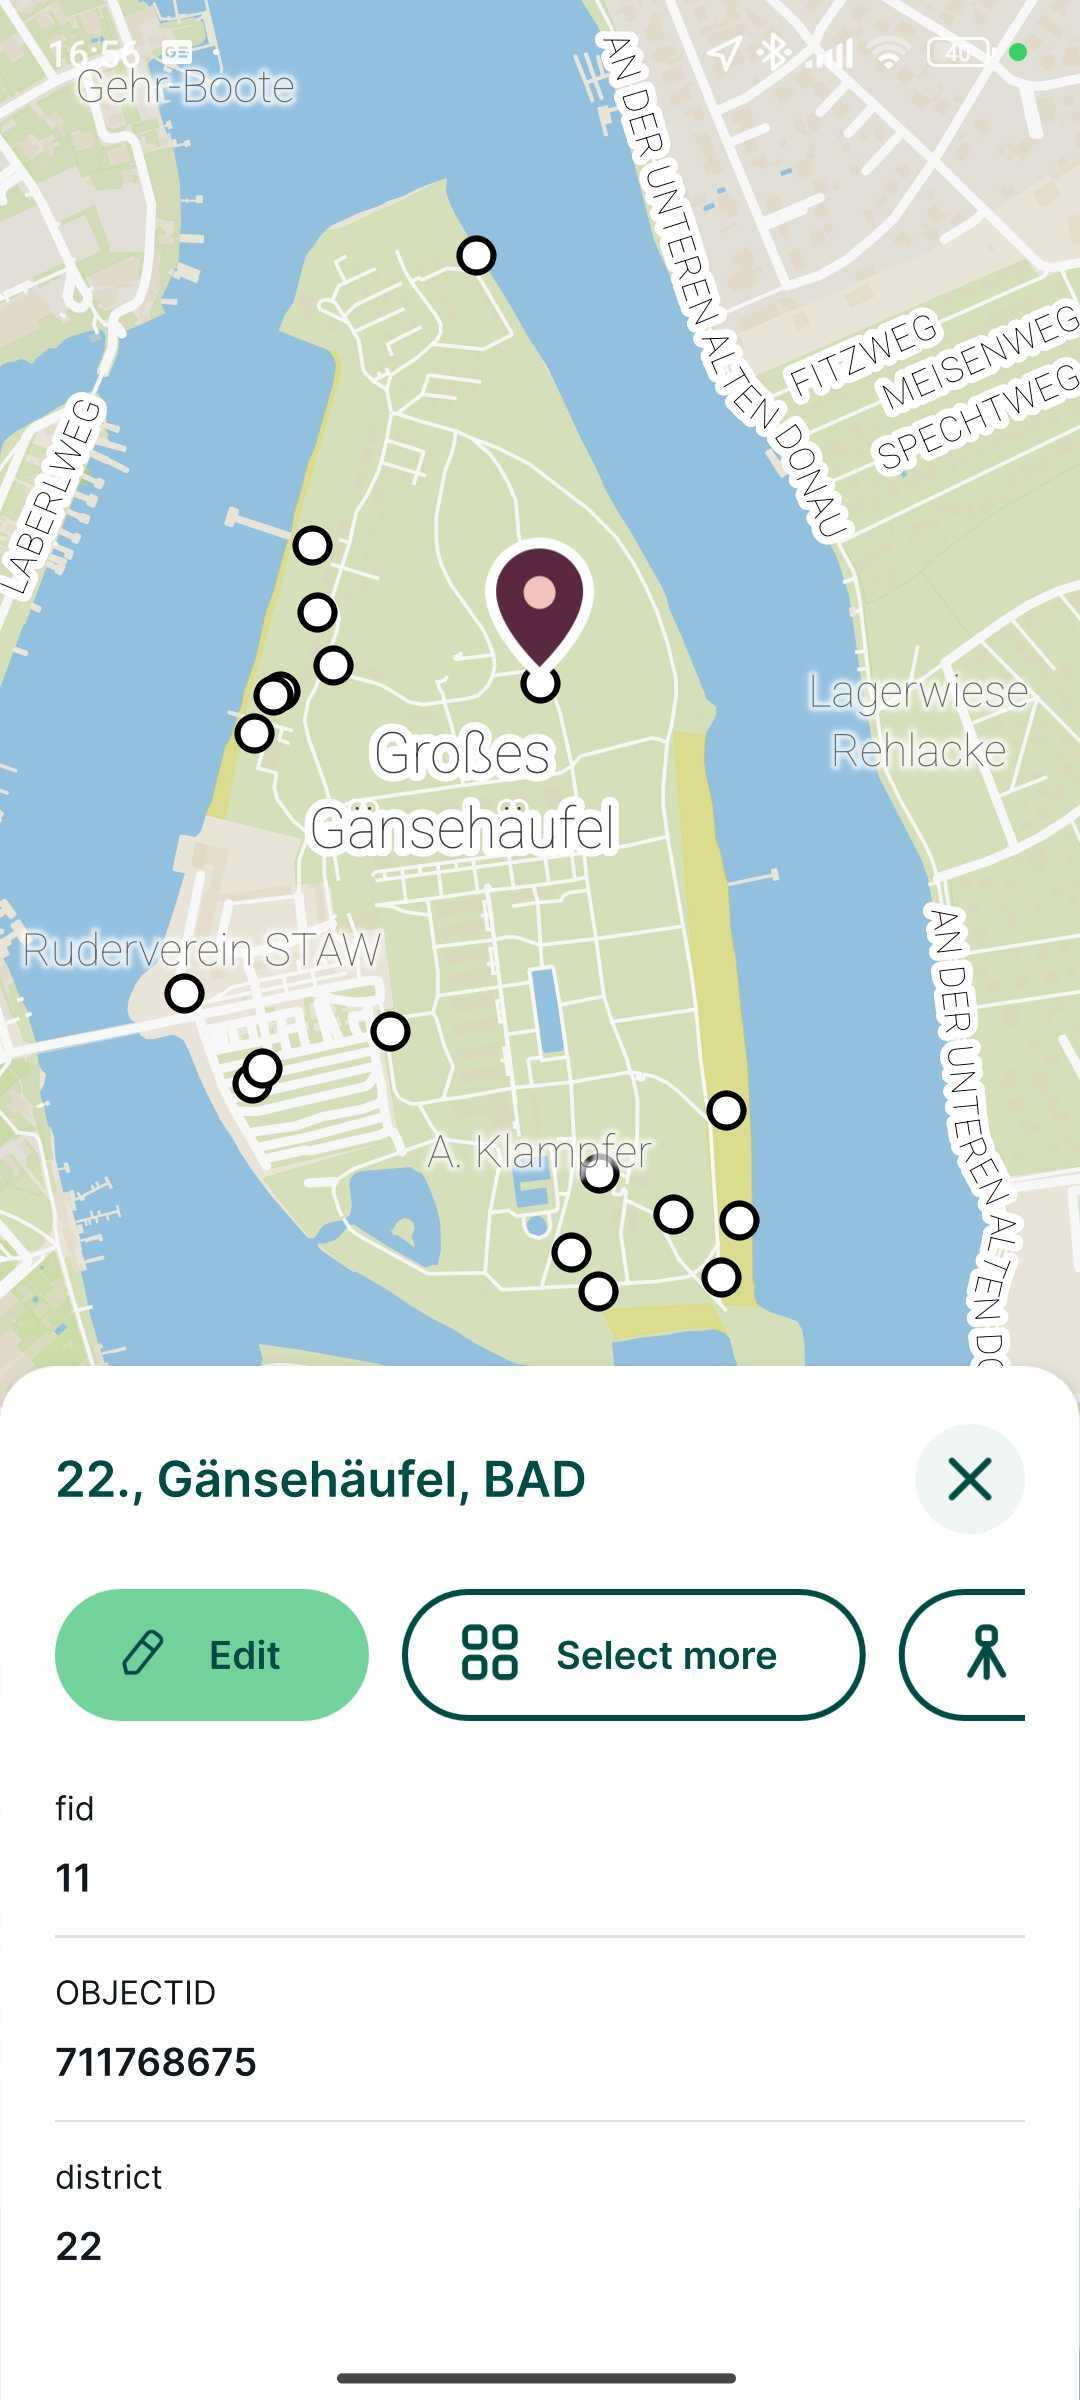 

Editing tree health with predefined values.

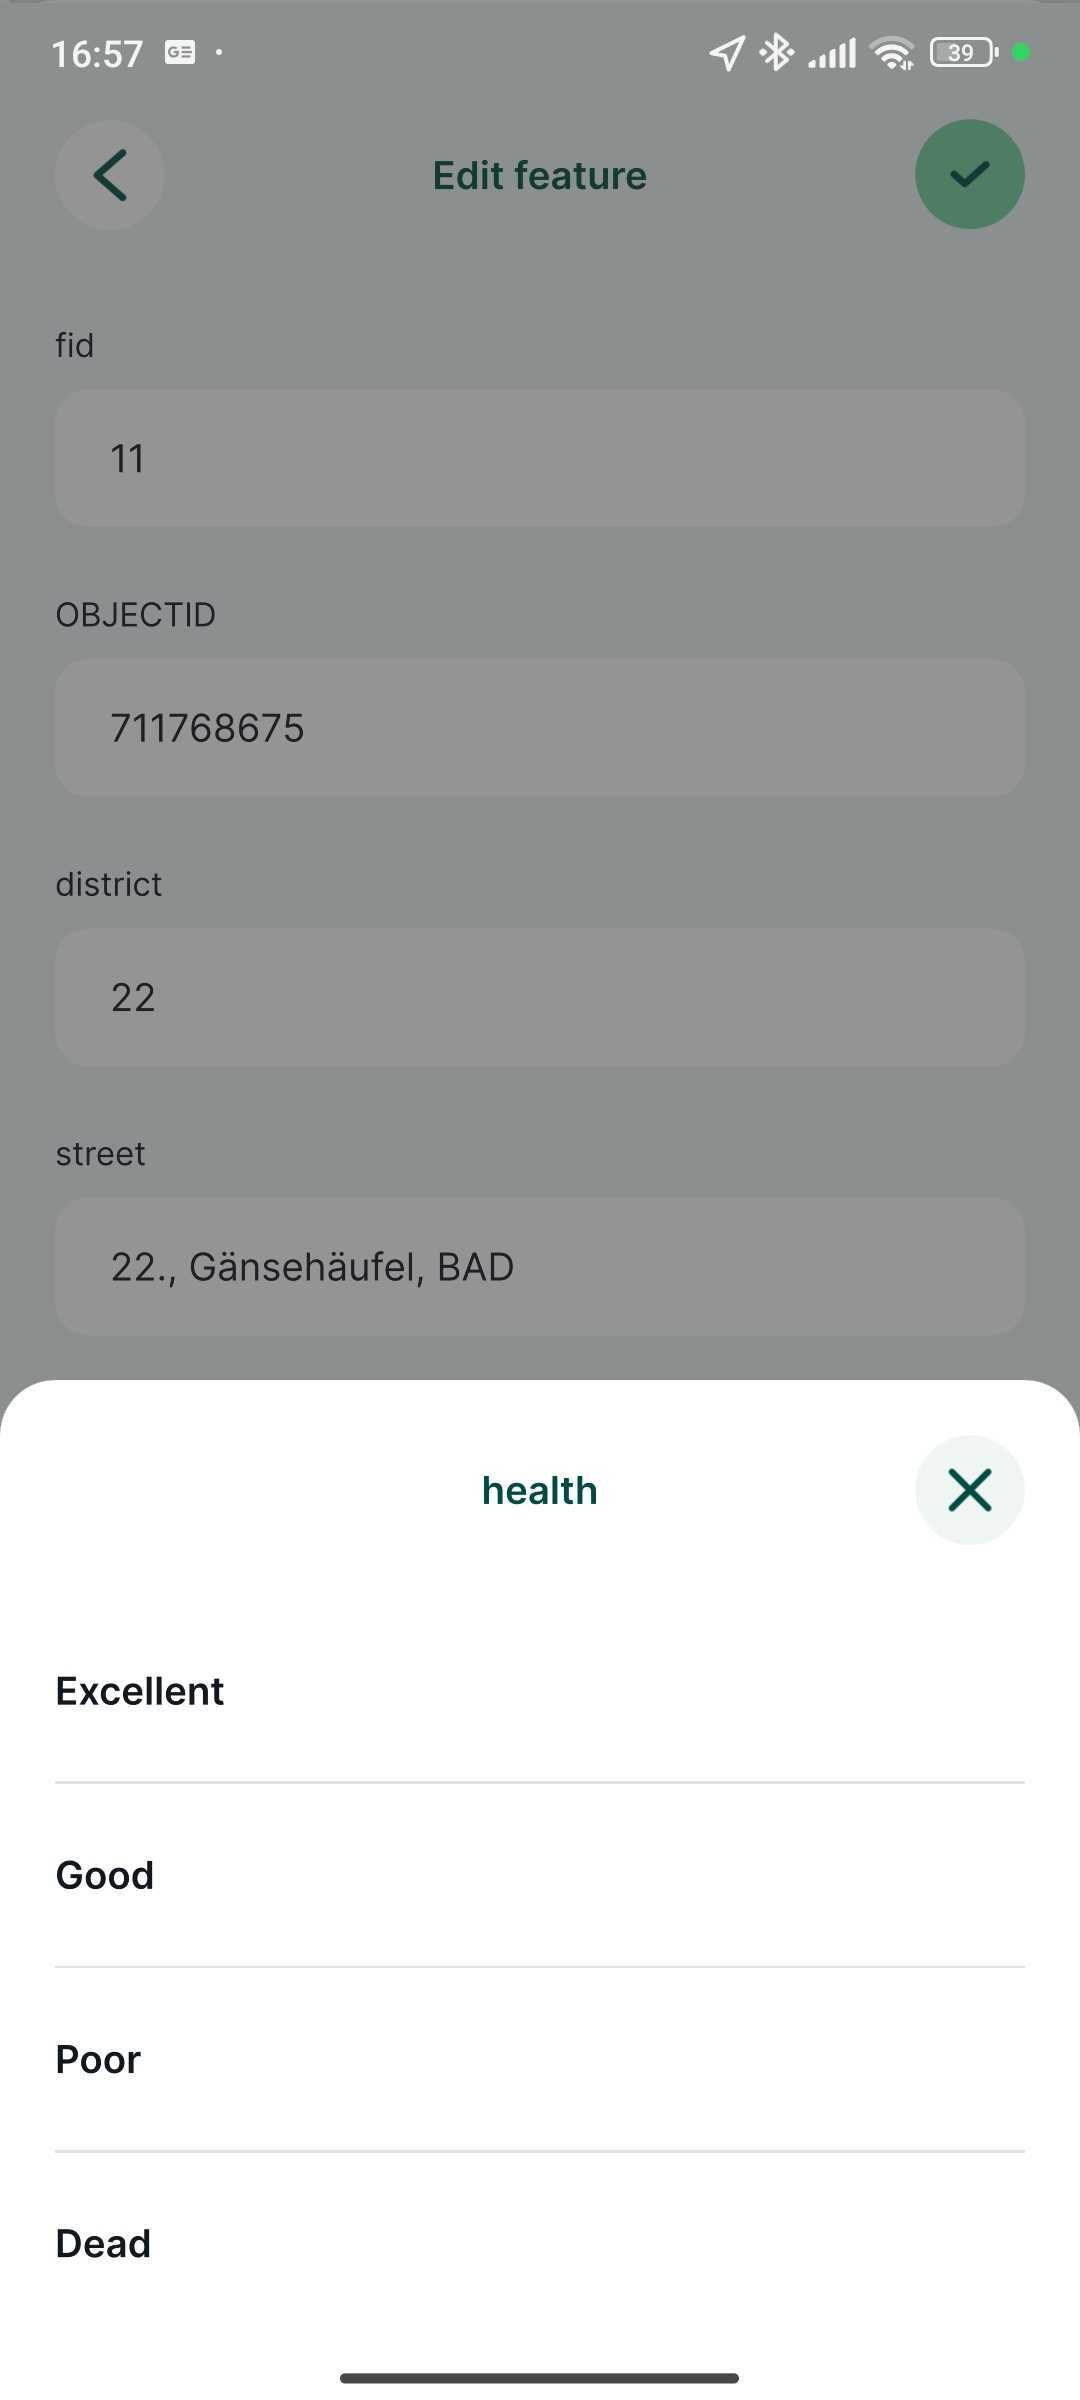